### Project 3: Word Similarity Visualisation

description:
The idea for this project is to create a tool that takes one word input,
calculates the top 5 most and least related words to it
based on the Word2Vec embeddings (possibly also different embeddings like GloVe)
and visualises them in a scatterplot using PCA.

In [20]:
#imports

import numpy as np
from numpy import linalg as la
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import spacy

In [11]:
# get word2vec model

#we used a pre trained word2vec model via gensim

nlp = spacy.load("en_core_web_md")

# Access word vectors using SpaCy's model
word_vector = nlp("input").vector

#print(word_vector)

In [12]:
# calculate word similarity

def cosine_similarity(v1,v2):
    dot_result = np.dot(v1,v2)
    n1 = la.norm(v1)
    n2 = la.norm(v2)
    result = dot_result/(n1*n2)
    return result


In [13]:
# PCA 

def reduce(vec):
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(vec)
    return reduced


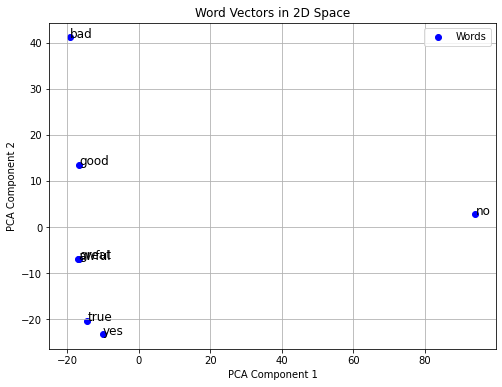

In [18]:
#Visualisation

my_words = ["great","good","no","bad","true","awful","yes"]

word_vectors = [nlp(word).vector for word in my_words]
reduced_vectors = reduce(word_vectors)

x = reduced_vectors[:,0]
y = reduced_vectors[:,1]

plt.figure(figsize=(8,6))
plt.scatter(x, y, marker='o', color='blue', label='Words')
for i, word in enumerate(my_words):
    plt.annotate(word, (x[i], y[i]), fontsize=12)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Word Vectors in 2D Space')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
cosine_similarity(nlp("awful").vector,nlp("great").vector)

0.27055994

In [21]:
def tsne_red(vec):
    tsne = TSNE(n_components=2, random_state=42)
    reduced_vector = tsne.fit_transform(vec)
    return reduced_vector

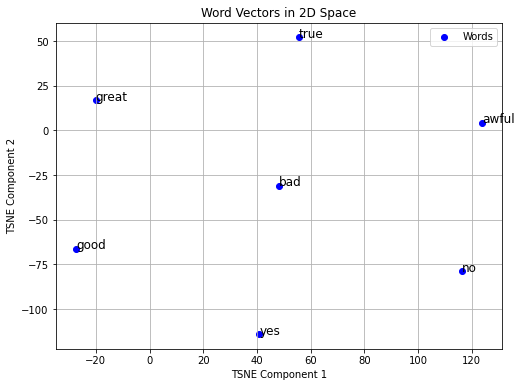

In [22]:
my_words = ["great","good","no","bad","true","awful","yes"]

word_vectors = [nlp(word).vector for word in my_words]
reduced_vectors = tsne_red(word_vectors)

x = reduced_vectors[:,0]
y = reduced_vectors[:,1]

plt.figure(figsize=(8,6))
plt.scatter(x, y, marker='o', color='blue', label='Words')
for i, word in enumerate(my_words):
    plt.annotate(word, (x[i], y[i]), fontsize=12)

plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('Word Vectors in 2D Space')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#User interface